In [13]:
# general imports
import pandas as pd
import tensorflow as tf 
import numpy as np
import os

# image reading
import cv2
import matplotlib.pyplot as plt

# **PUT PATH TO FOLDER WITH DATA HERE**
file_path = '/spfda/datas/Dog Emotion'

# defines basic dataset info
class_names = ['angry', 'happy', 'relaxed', 'sad']
num_classes = 4


"\n# Grace Doin stuff\nimg_size = (192, 192, 3)\nprint(f'{num_classes} classes: {class_names}\nimage size: {img_size}')\n\nlabels_df = pd.read_csv('/spfda/datas/Dog Emotion/labels.csv')\nprint(labels_df)\n#  \nkey = pd.read_csv(f'{file_path}/labels.csv')\n\n\nimages = []\nlabels = []\nfor image in labels_df.iloc:\n    if image is None:\n        print('Wrong path:', path)\n    else:\n        i = cv2.imread(file_path + image[2] + '/' + image[1], cv2.IMREAD_COLOR)\n        images.append(np.asarray(cv2.resize(i, (192,192))[:, :, ::-1]))\n        \n        # labels will be in the form of a vector: [0, 1, 0, 0] or [1, 0, 0, 0]\n        label = np.zeros(num_classes)\n        label[class_names.index(image[2])] = 1\n        labels.append(label)\n    \n"

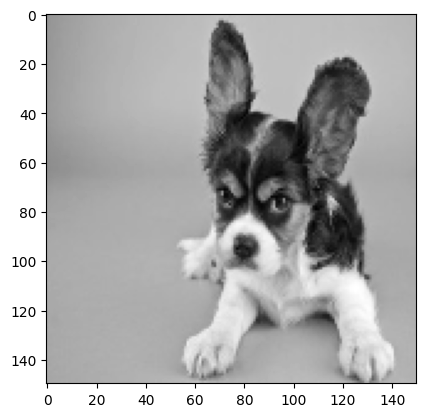

In [12]:
img_size = 150

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [14]:
training_data = []

def create_training_data():
    for category in class_names:
        path = os.path.join(file_path, category)
        class_num = class_names.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
                
                #plt.imshow(img_array, cmap='gray')
                #plt.show()
                
            except Exception as e:
                pass

create_training_data()
print(len(training_data))


4000


In [19]:
import random

random.seed(142857)
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])


3
0
2
0
2
1
0
1
3
0


In [22]:
x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 1)
y = np.array()